# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
from config import weather_api_key
import matplotlib.pyplot as plt
import requests
import json
from citipy import citipy
import numpy as np
import pandas as pd
import datetime as dt
from scipy import stats

# output file
csvoutput = 'weatherpy_output.csv'

# for API
city = ""
units = 'imperial'
url = f'https://api.openweathermap.org/data/2.5/weather?units={units}&q={city}&appid={weather_api_key}'


## Generate Cities List

In [2]:
# coordinate data
lats = ()
lons = ()

coords = []
cities = []

lats = np.random.uniform(low=-90, high=90, size=5000)
lons = np.random.uniform(low=-180, high=180, size=5000)
coords = zip(lats, lons)

for coord in coords:
    city = citipy.nearest_city(coord[0], coord[1]).city_name

    if city not in cities:
        cities.append(city)
print(len(cities))

1461


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [3]:
# variables
city_name = []
city_lat = []
city_lon = []
city_temp = []
city_humid = []
city_country = []
city_wind = []
city_date = []
city_cloud = []
cityid = ""
cityname = ""
city_id = []

# run through each city
for city in cities:

    response = requests.get(f'https://api.openweathermap.org/data/2.5/weather?units={units}&q={city}&appid={weather_api_key}').json()
    
    try:
        cityname = response['name']
        cityid = response['sys']['id']
        city_name.append(cityname)
        city_id.append(cityid)
        city_lat.append(response['coord']['lat'])
        city_lon.append(response['coord']['lon'])
        city_temp.append(response['main']['temp_max'])
        city_humid.append(response['main']['humidity'])
        city_country.append(response['sys']['country'])
        city_wind.append(response['wind']['speed'])
        city_date.append(response['dt'])
        city_cloud.append(response['clouds']['all'])
        print(f'Found {cityname}, ID {cityid}.')
    except:
        print(f'!!!!!\t {city} not found \t!!!!!')
        pass

    #print(response)

 not found 	!!!!!
!!!!!	 petropavlivka not found 	!!!!!
!!!!!	 loikaw not found 	!!!!!
!!!!!	 ciudad bolivar not found 	!!!!!
!!!!!	 boende not found 	!!!!!
Found Andros Town, ID 7269.
!!!!!	 port keats not found 	!!!!!
!!!!!	 deputatskiy not found 	!!!!!
!!!!!	 manggar not found 	!!!!!
!!!!!	 yomitan not found 	!!!!!
!!!!!	 carutapera not found 	!!!!!
Found Ýpsonas, ID 6381.
!!!!!	 zhezkazgan not found 	!!!!!
Found Nador, ID 2380.
!!!!!	 tasbuget not found 	!!!!!
!!!!!	 coahuayana not found 	!!!!!
Found Moscow, ID 9029.
Found Alibag, ID 9052.
!!!!!	 sao felix do xingu not found 	!!!!!
!!!!!	 makurdi not found 	!!!!!
Found Gafanha da Encarnação, ID 2013564.
Found Tautira, ID 7318.
Found Nouadhibou, ID 2444.
!!!!!	 tshela not found 	!!!!!
Found Oyama, ID 7957.
!!!!!	 fevralsk not found 	!!!!!
Found Lamar, ID 5407.
!!!!!	 mgachi not found 	!!!!!
!!!!!	 puerto suarez not found 	!!!!!
!!!!!	 formosa do rio preto not found 	!!!!!
!!!!!	 srivardhan not found 	!!!!!
Found Alexandria, ID 2512.

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [16]:
weatherdf = pd.DataFrame({'City': city_name, "Lat": city_lat, "Lng": city_lon, 'Max Temp': city_temp, 'Humidity': city_humid, 'Cloudiness': city_cloud, 'Wind Speed': city_wind, 'Country': city_country, 'Date': city_date})

weatherdf.to_csv(f'Outputs/{csvoutput}', index=False)

print(len(weatherdf))
weatherdf.head()

660


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Margate,51.38,1.39,57.99,73,12,7.00,GB,1604120447
1,Jamestown,42.10,-79.24,34.00,92,90,5.82,US,1604120192
2,Muroto-misakicho,33.28,134.15,68.00,37,20,9.17,JP,1604120533
3,Puerto Ayora,-0.74,-90.35,70.00,91,90,5.01,EC,1604120385
4,Punta Arenas,-53.15,-70.92,42.80,87,75,6.93,CL,1604120374


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

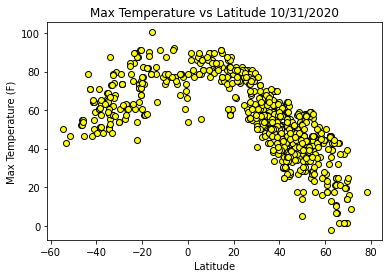

This scatterplot is showing a clear correlation between latitude and tempurature, with temps being the highest near 0 Lat, and getting cooler the further away from 0 it gets in either direction.


In [5]:
date = pd.to_datetime('today').date()
date = date.strftime('%m/%d/%Y')

plt.scatter(x=weatherdf['Lat'], y=weatherdf['Max Temp'], color='yellow', edgecolors='black')
plt.title(f'Max Temperature vs Latitude {date}')
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')


plt.show()
print('This scatterplot is showing a clear correlation between latitude and tempurature, with temps being the highest near 0 Lat, and getting cooler the further away from 0 it gets in either direction.')

## Latitude vs. Humidity Plot

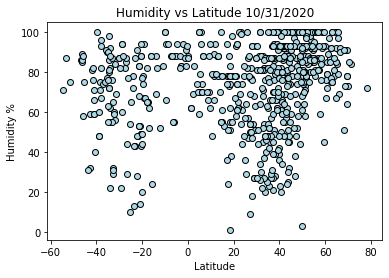

There does not seem to be a strong correlation between latitude and humidity. The only correlation one might retrieve from this data is that the equator generally has a higher humidity.


In [6]:
date = pd.to_datetime('today').date()
date = date.strftime('%m/%d/%Y')

plt.scatter(x=weatherdf['Lat'], y=weatherdf['Humidity'], color='lightblue', edgecolors='black')
plt.title(f'Humidity vs Latitude {date}')
plt.ylabel('Humidity %')
plt.xlabel('Latitude')


plt.show()
print('There does not seem to be a strong correlation between latitude and humidity. The only correlation one might retrieve from this data is that the equator generally has a higher humidity.')

## Latitude vs. Cloudiness Plot

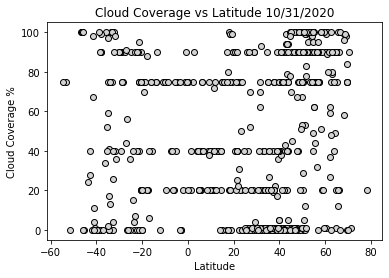

There does not appear to be any correlation at all between latitude and cloud coverage. The full range of cloud coverage appears across most latitudes.


In [7]:
date = pd.to_datetime('today').date()
date = date.strftime('%m/%d/%Y')

plt.scatter(x=weatherdf['Lat'], y=weatherdf['Cloudiness'], color='lightgrey', edgecolors='black')
plt.title(f'Cloud Coverage vs Latitude {date}')
plt.ylabel('Cloud Coverage %')
plt.xlabel('Latitude')


plt.show()
print('There does not appear to be any correlation at all between latitude and cloud coverage. The full range of cloud coverage appears across most latitudes.')

## Latitude vs. Wind Speed Plot

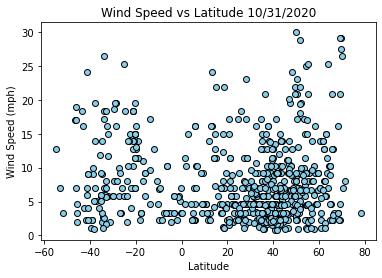

There does not seem to be a strong correlation between latitude and humidity, since the full range of humidity appears across most latitudes.


In [8]:
date = pd.to_datetime('today').date()
date = date.strftime('%m/%d/%Y')

plt.scatter(x=weatherdf['Lat'], y=weatherdf['Wind Speed'], color='skyblue', edgecolors='black')
plt.title(f'Wind Speed vs Latitude {date}')
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')


plt.show()
print('There does not seem to be a strong correlation between latitude and humidity, since the full range of humidity appears across most latitudes.')

## Linear Regression

In [9]:
southlat = weatherdf.loc[weatherdf['Lat'] < 0]
northlat = weatherdf.loc[weatherdf['Lat'] > 0]

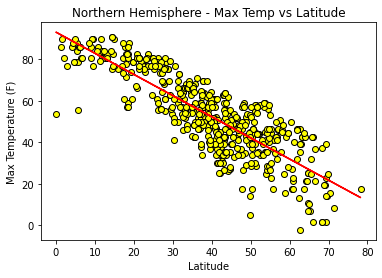

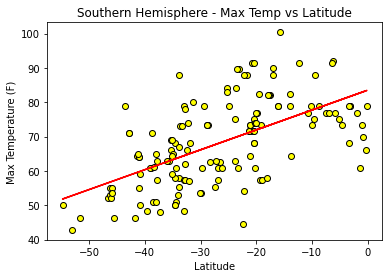

Both graphs show a definitive trend in a decreasing temperature the further from the equator you go. It may be worth noting that this trend is much more consistant in the northern hemisphere than the south.


In [10]:
# North Hemisphere
# regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(northlat['Lat'], northlat['Max Temp'])
regress_values = northlat['Lat'] * slope + intercept
plt.plot(northlat['Lat'],regress_values,"r-")

# scatterplot
plt.scatter(x=northlat['Lat'], y=northlat['Max Temp'], color='yellow', edgecolors='black')
plt.title('Northern Hemisphere - Max Temp vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.show()

# South Hemisphere
# regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(southlat['Lat'], southlat['Max Temp'])
regress_values = southlat['Lat'] * slope + intercept
plt.plot(southlat['Lat'],regress_values,"r-")

# scatterplot
plt.scatter(x=southlat['Lat'], y=southlat['Max Temp'], color='yellow', edgecolors='black')
plt.title('Southern Hemisphere - Max Temp vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.show()

print('Both graphs show a definitive trend in a decreasing temperature the further from the equator you go. It may be worth noting that this trend is much more consistant in the northern hemisphere than the south.')

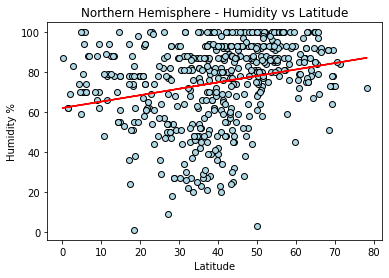

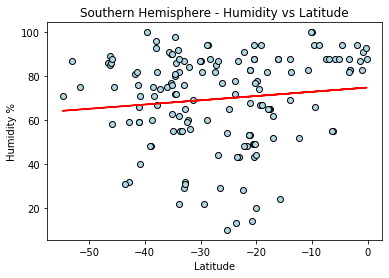

There is no clear trend in these graphs. High Humidity seems to be prevelant throughout all northern latitude ranges, as well as the south. The only exception is around the 45* latitude in the northern hemisphere and around 25* in the southern hemisphere, where there is generally a much bigger margin of humidity values.


In [11]:
# North Hemisphere
# # regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(northlat['Lat'], northlat['Humidity'])
regress_values = northlat['Lat'] * slope + intercept
plt.plot(northlat['Lat'],regress_values,"r-")

# scatterplot
plt.scatter(x=northlat['Lat'], y=northlat['Humidity'], color='lightblue', edgecolors='black')
plt.title('Northern Hemisphere - Humidity vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.show()

# South Hemisphere
# regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(southlat['Lat'], southlat['Humidity'])
regress_values = southlat['Lat'] * slope + intercept
plt.plot(southlat['Lat'],regress_values,"r-")

# scatterplot
plt.scatter(x=southlat['Lat'], y=southlat['Humidity'], color='lightblue', edgecolors='black')
plt.title('Southern Hemisphere - Humidity vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.show()

print('There is no clear trend in these graphs. High Humidity seems to be prevelant throughout all northern latitude ranges, as well as the south. The only exception is around the 45* latitude in the northern hemisphere and around 25* in the southern hemisphere, where there is generally a much bigger margin of humidity values.')

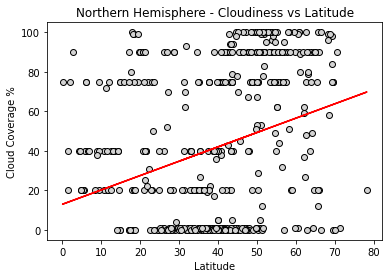

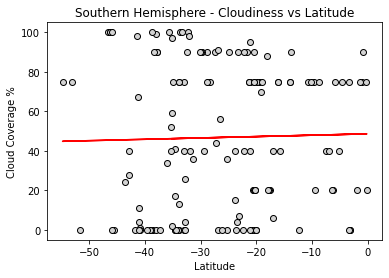

There is no obvious correlation between cloudiness vs latitude either. One thing I noticed is that there appears to many data points at common cloud coverage intervals, appearing as a sort of horizontal line. Im guessing this must be due to the way the cloud data in gathered.


In [12]:
# Northern Hemisphere
# regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(northlat['Lat'], northlat['Cloudiness'])
regress_values = northlat['Lat'] * slope + intercept
plt.plot(northlat['Lat'],regress_values,"r-")

# scatterplot
plt.scatter(x=northlat['Lat'], y=northlat['Cloudiness'], color='lightgrey', edgecolors='black')
plt.title('Northern Hemisphere - Cloudiness vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloud Coverage %')
plt.show()

# Southern Hemisphere
# regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(southlat['Lat'], southlat['Cloudiness'])
regress_values = southlat['Lat'] * slope + intercept
plt.plot(southlat['Lat'],regress_values,"r-")

# scatterplot
plt.scatter(x=southlat['Lat'], y=southlat['Cloudiness'], color='lightgrey', edgecolors='black')
plt.title('Southern Hemisphere - Cloudiness vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloud Coverage %')
plt.show()

print('There is no obvious correlation between cloudiness vs latitude either. One thing I noticed is that there appears to many data points at common cloud coverage intervals, appearing as a sort of horizontal line. Im guessing this must be due to the way the cloud data in gathered.')

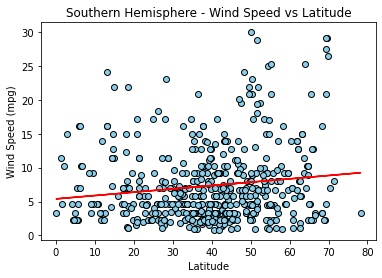

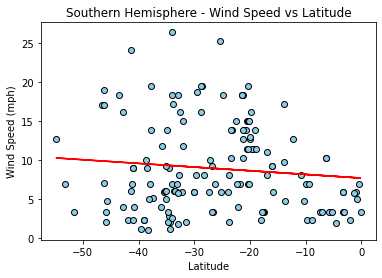

The only trend I see in these graphs is that the wind speed is fairly similar throughout both hemispheres, with the exception of the far north where wind speed has some high speed outliers.


In [13]:
# Northern Hemisphere
# regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(northlat['Lat'], northlat['Wind Speed'])
regress_values = northlat['Lat'] * slope + intercept
plt.plot(northlat['Lat'],regress_values,"r-")

# scatterplot
plt.scatter(x=northlat['Lat'], y=northlat['Wind Speed'], color='skyblue', edgecolors='black')
plt.title('Southern Hemisphere - Wind Speed vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mpg)')
plt.show()

# Southern Hemisphere
# regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(southlat['Lat'], southlat['Wind Speed'])
regress_values = southlat['Lat'] * slope + intercept
plt.plot(southlat['Lat'],regress_values,"r-")

# scatterplot
plt.scatter(x=southlat['Lat'], y=southlat['Wind Speed'], color='skyblue', edgecolors='black')
plt.title('Southern Hemisphere - Wind Speed vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()

print('The only trend I see in these graphs is that the wind speed is fairly similar throughout both hemispheres, with the exception of the far north where wind speed has some high speed outliers.')